<a href="https://colab.research.google.com/github/satyajitpatil2002/mental_health_Project/blob/main/Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# compare ensemble to each baseline classifier
from numpy import mean
import pandas as pd
import numpy as np
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

In [ ]:
data= pd.read_csv("/content/labelleddata01.csv")

In [ ]:
# prompt: df=DataFrame(data)

df = pd.DataFrame(data)


In [ ]:
df.head(5)

,region,no_salaried_family,liability,parent_qualification,college_expenses,community_impact,hometown_district,engg_education,college_resource,volunteer_activities,...,daily-routine,routine_pattern,selfcare,mental_wellness,college_overhelmed,sentiment,sleep_cycle,strees_relief,hobbies,total
0,1,0,1,1,1,1,1,0,1,0,...,1,1,1,1,1,0,0,1,1,42
1,1,0,0,0,1,0,1,0,1,0,...,2,0,0,1,1,1,1,1,1,46
2,1,0,0,0,1,0,2,0,0,0,...,2,1,1,0,1,2,0,2,1,37
3,1,2,0,2,1,0,1,0,0,1,...,2,0,2,0,2,0,0,2,0,43
4,0,1,0,1,1,1,1,0,0,1,...,2,0,0,1,2,0,0,1,1,50


In [ ]:

# prompt: df.describe

df.describe()


,region,no_salaried_family,liability,parent_qualification,college_expenses,community_impact,hometown_district,engg_education,college_resource,volunteer_activities,...,daily-routine,routine_pattern,selfcare,mental_wellness,college_overhelmed,sentiment,sleep_cycle,strees_relief,hobbies,total
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,...,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,0.524333,0.427002,0.207221,0.791209,0.882261,0.237049,0.833595,0.273155,0.803768,0.447410,...,1.306122,0.748823,0.323391,0.828885,0.879121,0.670330,0.803768,1.114600,0.888540,49.621664
std,0.499800,0.702484,0.405634,0.717296,0.322553,0.425607,0.456196,0.445930,0.567005,0.497617,...,0.766133,0.434031,0.554259,0.376905,0.608757,0.753158,0.945422,1.106466,0.314948,6.590423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,45.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,50.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,54.000000
max,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,...,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,4.000000,4.000000,1.000000,70.000000


In [ ]:
df.shape

(637, 67)

In [ ]:
df.isnull().sum()

region                  0
no_salaried_family      0
liability               0
parent_qualification    0
college_expenses        0
                       ..
sentiment               0
sleep_cycle             0
strees_relief           0
hobbies                 0
total                   0
Length: 67, dtype: int64

In [ ]:
# prompt: code for remove null

df.dropna(inplace=True)


In [ ]:
df.shape

(637, 67)

>lr 0.835 (0.037)
>knn 0.836 (0.039)
>cart 0.684 (0.050)
>svm 0.907 (0.027)
>bayes 0.824 (0.035)
>stacking 0.906 (0.025)


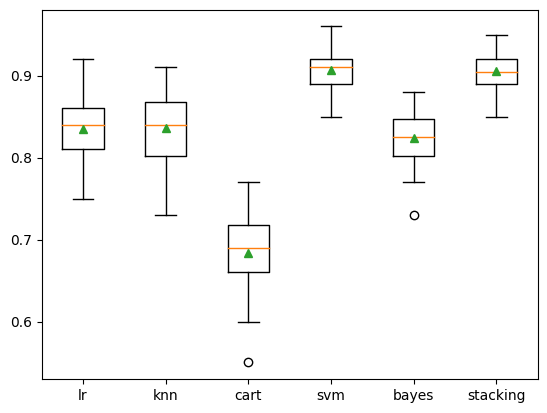

Accuracy on the test set: 95.66666666666667
Precision: 0.9620253164556962
Recall: 0.9559748427672956
F1 Score: 0.9589905362776026


In [ ]:

# get the dataset
def get_dataset(df):
 X, y = make_classification(n_samples=1000, n_features=66, n_informative=45, n_redundant=15, random_state=1)
 return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = SVC()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression(max_iter=10000)
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset(df)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Select the best-performing model (in this case, let's assume it's the stacking classifier)
best_model = get_models()['stacking']

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy*100)

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


>lr 0.835 (0.037)
>knn 0.836 (0.039)
>cart 0.692 (0.039)
>svm 0.907 (0.027)
>bayes 0.824 (0.035)
>stacking 0.865 (0.034)


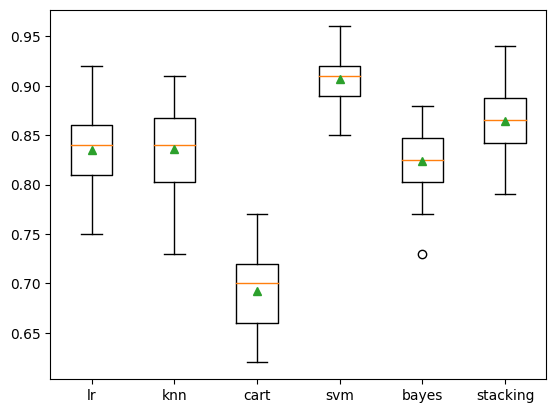

Accuracy on the test set: 92.33333333333333
Precision: 0.925
Recall: 0.9308176100628931
F1 Score: 0.9278996865203761


In [ ]:

# get the dataset
def get_dataset(df):
 X, y = make_classification(n_samples=1000, n_features=66, n_informative=45, n_redundant=15, random_state=1)
 return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = DecisionTreeClassifier()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression(max_iter=10000)
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset(df)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Select the best-performing model (in this case, let's assume it's the stacking classifier)
best_model = get_models()['stacking']

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy*100)

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


>lr 0.835 (0.037)
>knn 0.836 (0.039)
>cart 0.681 (0.047)
>svm 0.907 (0.027)
>bayes 0.824 (0.035)
>stacking 0.908 (0.025)


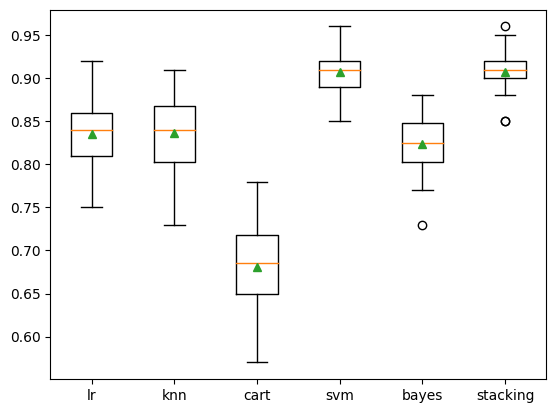

Accuracy on the test set: 96.33333333333334
Precision: 0.9683544303797469
Recall: 0.9622641509433962
F1 Score: 0.9652996845425867


In [ ]:

# get the dataset
def get_dataset(df):
 X, y = make_classification(n_samples=1000, n_features=66, n_informative=45, n_redundant=15, random_state=1)
 return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression(max_iter=10000)
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset(df)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Select the best-performing model (in this case, let's assume it's the stacking classifier)
best_model = get_models()['stacking']

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy*100)

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


>lr 0.835 (0.037)
>knn 0.836 (0.039)
>cart 0.679 (0.051)
>svm 0.907 (0.027)
>bayes 0.824 (0.035)
>stacking 0.899 (0.021)


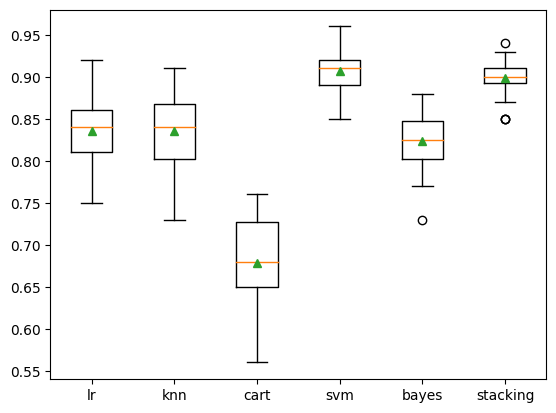

Accuracy on the test set: 96.33333333333334
Precision: 0.9683544303797469
Recall: 0.9622641509433962
F1 Score: 0.9652996845425867


In [ ]:


# get the dataset
def get_dataset(df):
 X, y = make_classification(n_samples=1000, n_features=66, n_informative=45, n_redundant=15, random_state=1)
 return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = KNeighborsClassifier()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression(max_iter=10000)
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset(df)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Select the best-performing model (in this case, let's assume it's the stacking classifier)
best_model = get_models()['stacking']

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy*100)

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


>lr 0.835 (0.037)
>knn 0.836 (0.039)
>cart 0.682 (0.040)
>svm 0.907 (0.027)
>bayes 0.824 (0.035)
>stacking 0.884 (0.024)


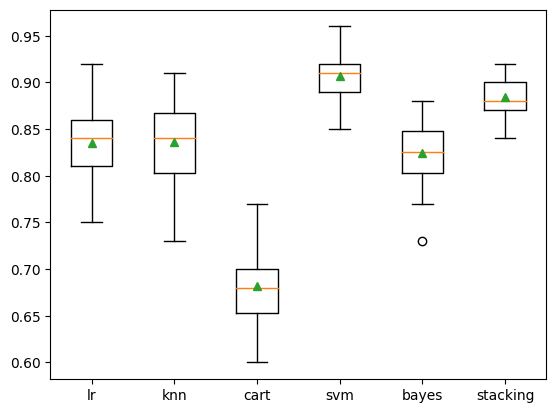

Accuracy on the test set: 90.66666666666666
Precision: 0.901840490797546
Recall: 0.9245283018867925
F1 Score: 0.9130434782608695


In [ ]:


# get the dataset
def get_dataset(df):
 X, y = make_classification(n_samples=1000, n_features=66, n_informative=45, n_redundant=15, random_state=1)
 return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = GaussianNB()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression(max_iter=10000)
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset(df)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Select the best-performing model (in this case, let's assume it's the stacking classifier)
best_model = get_models()['stacking']

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy*100)

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [ ]:
'''# Get the base estimators of the StackingClassifier
base_estimators = best_model.estimators_

# Initialize an array to store the feature importances for each base estimator
importances = np.zeros(X.shape[1])

# Iterate over the base estimators
for estimator in base_estimators:
    if hasattr(estimator, 'feature_importances_'):
        # If the base estimator has feature importances, accumulate them
        importances += estimator.feature_importances_

# Normalize the importances
importances /= len(base_estimators)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(30, 10))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.show()'''


'# Get the base estimators of the StackingClassifier\nbase_estimators = best_model.estimators_\n\n# Initialize an array to store the feature importances for each base estimator\nimportances = np.zeros(X.shape[1])\n\n# Iterate over the base estimators\nfor estimator in base_estimators:\n    if hasattr(estimator, \'feature_importances_\'):\n        # If the base estimator has feature importances, accumulate them\n        importances += estimator.feature_importances_\n\n# Normalize the importances\nimportances /= len(base_estimators)\n\n# Sort feature importances in descending order\nindices = np.argsort(importances)[::-1]\n\n# Plot feature importances\nplt.figure(figsize=(30, 10))\nplt.title("Feature Importances")\nplt.bar(range(X.shape[1]), importances[indices], align="center")\nplt.xticks(range(X.shape[1]), indices)\nplt.xlabel("Feature Index")\nplt.ylabel("Feature Importance")\nplt.show()'

 **Optimization code with feature selected with anova**

Selected Feature Names:
['Feature 1', 'Feature 4', 'Feature 7', 'Feature 11', 'Feature 12', 'Feature 15', 'Feature 18', 'Feature 24', 'Feature 26', 'Feature 29', 'Feature 40', 'Feature 42', 'Feature 44', 'Feature 45', 'Feature 51', 'Feature 52', 'Feature 57', 'Feature 59', 'Feature 60', 'Feature 62']
>lr 0.862 (0.032)
>knn 0.897 (0.031)
>cart 0.784 (0.045)
>svm 0.919 (0.027)
>bayes 0.829 (0.038)
>stacking 0.928 (0.025)


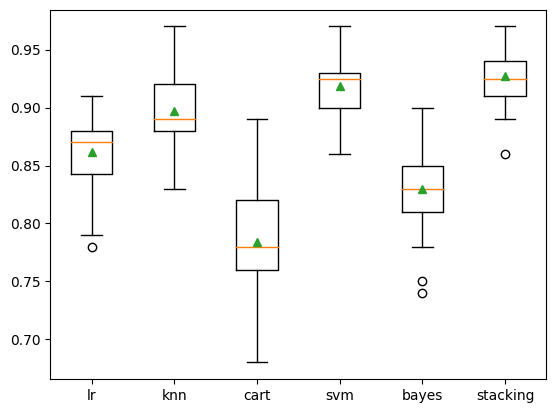

Accuracy on the test set: 0.9066666666666666


In [ ]:
#old one
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=66, n_informative=15, n_redundant=5, random_state=1)
    return X, y


# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = SVC(max_iter=1000)
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(max_iter=10000)
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# Perform ANOVA feature selection
def perform_anova_feature_selection(X, y, k=20):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = selector.fit_transform(X, y)
    selected_feature_indices = selector.get_support(indices=True)
    selected_feature_names = [f'Feature {idx+1}' for idx in selected_feature_indices]
    print("Selected Feature Names:")
    print(selected_feature_names)
    return X_selected

# Define dataset
X, y = get_dataset()

# Perform ANOVA feature selection
X_selected = perform_anova_feature_selection(X, y)

# Standardize the selected data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_scaled, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# Plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Select the best-performing model (in this case, let's assume it's the stacking classifier)
best_model = get_models()['stacking']

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)



PRINT THE P VALUE AND F SCORE FOR EACH FEATURES BY ANOVA


In [ ]:
from sklearn.feature_selection import f_classif

# Assuming X is your feature matrix and y is your target variable
# Perform ANOVA F-test
f_scores, p_values = f_classif(X, y)

# Print ANOVA F-scores for each feature
print("ANOVA F-scores:")
for i, score in enumerate(f_scores):
    print(f"Feature {i+1}: {score}")

# Print p-values for each feature
print("\nP-values:")
for i, p_value in enumerate(p_values):
    print(f"Feature {i+1}: {p_value}")


ANOVA F-scores:
Feature 1: 3.043724841976174
Feature 2: 0.8912378343158238
Feature 3: 1.2187406819861226
Feature 4: 1.9039642656265297
Feature 5: 0.20807097457304036
Feature 6: 1.3438083954357911
Feature 7: 62.76751045531079
Feature 8: 0.3862408093281272
Feature 9: 0.44476391605477844
Feature 10: 0.4958980780672447
Feature 11: 61.38473923766188
Feature 12: 8.00585158235717
Feature 13: 0.2793317550551858
Feature 14: 0.11199939598108456
Feature 15: 102.39353887977632
Feature 16: 0.02518189218437378
Feature 17: 0.6391501945669911
Feature 18: 64.529983069921
Feature 19: 1.8032218274405096
Feature 20: 0.7603280122583372
Feature 21: 0.7231206261305206
Feature 22: 0.6396415659802118
Feature 23: 0.06821242372642658
Feature 24: 2.2110630764266856
Feature 25: 0.07782819456113091
Feature 26: 50.95225490822751
Feature 27: 0.6280833344139786
Feature 28: 0.0013845992193210876
Feature 29: 3.7484634400434875
Feature 30: 0.16424015896795793
Feature 31: 0.5456248512030668
Feature 32: 0.00683442040218848

SCATTER PLOT FOR ANOVA

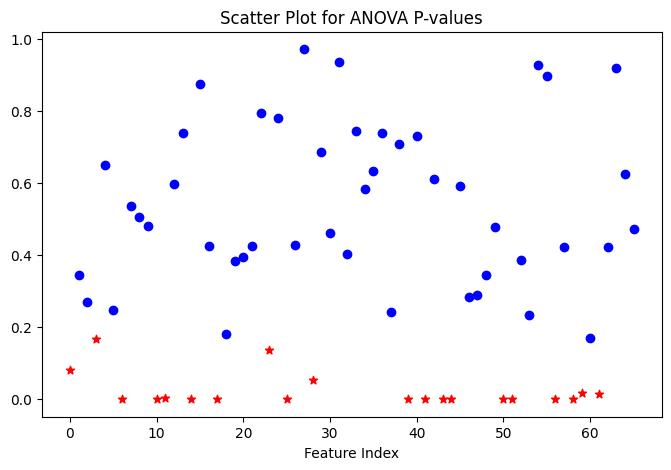

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

# Assuming X is your feature matrix and y is your target variable
# Perform ANOVA F-test
f_scores, p_values = f_classif(X, y)

# Selected feature indices
selected_feature_indices = [0, 3, 6, 10, 11, 14, 17, 23, 25, 28, 39, 41, 43, 44, 50, 51, 56, 58, 59, 61]
selected_feature_names = ['Feature 1', 'Feature 4', 'Feature 7', 'Feature 11', 'Feature 12', 'Feature 15', 'Feature 18', 'Feature 24', 'Feature 26', 'Feature 29', 'Feature 40', 'Feature 42', 'Feature 44', 'Feature 45', 'Feature 51', 'Feature 52', 'Feature 57', 'Feature 59', 'Feature 60', 'Feature 62']

# Plot scatter plot for p-values with selected features as stars
plt.figure(figsize=(8, 5))
for i, p_value in enumerate(p_values):
    marker = 'o' if i not in selected_feature_indices else '*'
    color = 'blue' if i not in selected_feature_indices else 'red'
    plt.scatter(i, p_value, marker=marker, color=color, label='Selected' if i in selected_feature_indices else 'Not Selected')
plt.title('Scatter Plot for ANOVA P-values')
plt.xlabel('Feature Index')
plt.ylabel('')

plt.show()


HERE WE CAN PRINT ACTUAL FEATURE NAME BASED ON THERE FEATURE INDEX

Using PCA

>lr 0.840 (0.036)
>knn 0.881 (0.027)
>cart 0.792 (0.030)
>svm 0.908 (0.024)
>bayes 0.850 (0.036)
>stacking 0.908 (0.024)


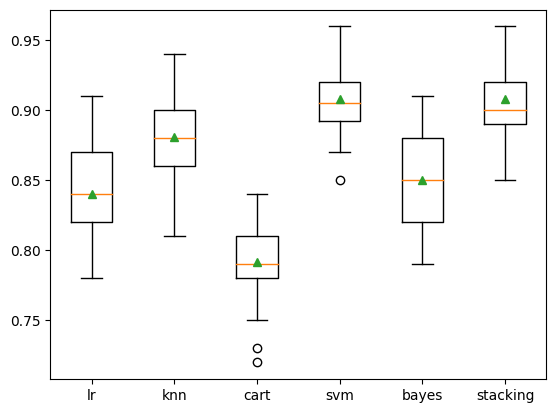

Accuracy on the test set: 0.9066666666666666


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=66, n_informative=15, n_redundant=5, random_state=1)
    return X, y

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = SVC()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = get_dataset()

# Apply PCA for feature selection
pca = PCA(n_components=10)  # Select 10 principal components
X_pca = pca.fit_transform(X)


# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_pca, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Select the best-performing model (in this case, let's assume it's the stacking classifier)
best_model = get_models()['stacking']

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

In [ ]:
# Print selected features
print("Selected Features after PCA:")
for i in range(len(pca.components_)):
    print(f"Principal Component {i+1}:")
    for j, feature in enumerate(pca.components_[i]):
        print(f"Feature {j+1}: {feature}")
    print()


Selected Features after PCA:
Principal Component 1:
Feature 1: 0.0011006759803513988
Feature 2: -0.0008994280652530187
Feature 3: -0.002085164995229793
Feature 4: -0.024652729347264167
Feature 5: 0.00227115803873971
Feature 6: 0.000606507044557527
Feature 7: -0.20388288019768033
Feature 8: 0.0029523296144548386
Feature 9: -0.001284427619740356
Feature 10: 0.0008793435479074076
Feature 11: 0.046473017020462054
Feature 12: 0.3457235467812635
Feature 13: 0.0017125323737563576
Feature 14: 0.010664737608013954
Feature 15: 0.7875984072774924
Feature 16: 0.005532520716698497
Feature 17: -0.0005528325174694031
Feature 18: 0.15916103539611587
Feature 19: 0.02757568986286497
Feature 20: -0.0026759776016635796
Feature 21: -0.003854934406713876
Feature 22: 0.047333830274562574
Feature 23: -0.004160772114576541
Feature 24: -0.0004461369773640158
Feature 25: -7.817172247905374e-05
Feature 26: -0.05250125212034008
Feature 27: -0.07089361221096392
Feature 28: 0.0015482560901435513
Feature 29: -0.10798

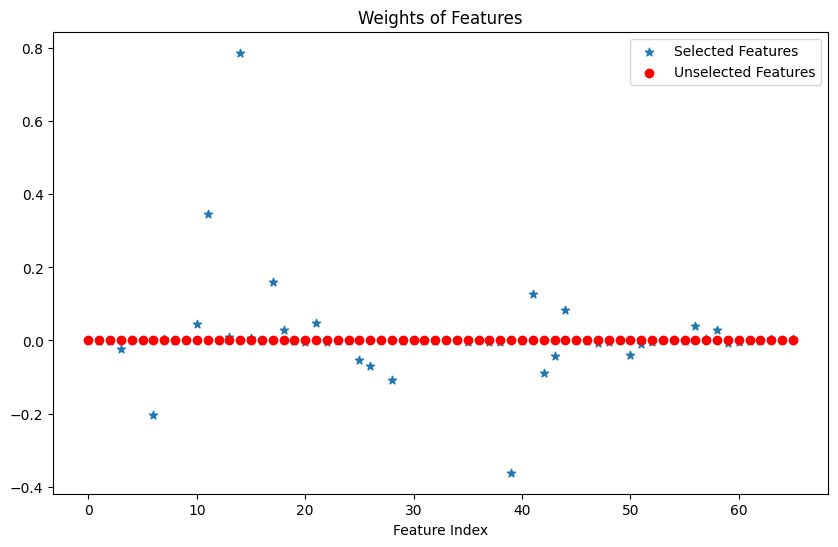

In [ ]:


# Get the weights of selected features
selected_features_weights = pca.components_

# Get the indices of unselected features
unselected_features_indices = [i for i in range(X.shape[1]) if i not in pca.components_]
plt.figure(figsize=(10, 6))

# Plot selected features with stars
plt.scatter(range(len(selected_features_weights[0])), selected_features_weights[0], label='Selected Features', marker='*')
# Plot unselected features with dots
plt.scatter(unselected_features_indices, [0]*len(unselected_features_indices), color= 'red', label='Unselected Features', marker='o')

plt.xlabel('Feature Index')
plt.ylabel('')
plt.title('Weights of Features')
plt.legend()
plt.show()


In [ ]:
# Get the indices of selected features after PCA
selected_feature_indices = pca.components_.argsort()[-10:][::-1]

# Print all selected features
print("Selected Features:")
for idx in selected_feature_indices:
    print(f"Feature {idx+1}: {X[:, idx]}")


Selected Features:
Feature [27 18 43 26 11 52 29 59 55 57 38 49 20 24 40 35  5 50 12  3 41 34  9 22
 48 42 58 66 21 56 37 31 54 10 46 39 63 47 30 13 64 28 25 15 61 62  2 60
 53  8 19  6  1 23 16 33 32 65 36 17 14  7 51 44  4 45]: [[-1.77322565 -0.61539766 -2.28795114 ... -1.81524888 -3.12751017
  -2.18228409]
 [-2.91920559  1.60550145 -3.35905057 ... -3.30523346 -1.04426028
   1.2576901 ]
 [ 3.71579165  3.6680884  -0.3472352  ...  0.94208305  0.34728674
   0.84455044]
 ...
 [-3.53258509 -0.04112031  1.04219291 ...  1.94942766 -1.5358985
  -1.89982069]
 [ 4.30804639 -1.26079165  1.31339641 ... -0.06564594 -0.03277287
  -3.54490027]
 [-4.70561297 -2.89647706 -4.56152634 ... -3.73496389  2.91258672
  -0.43794837]]
Feature [59 43 11 57  7 42  4 12 23 40 63 17 13 46 34 66 36  3 32 48 21  1  5 20
 39 10 56  9 65 16 30 38 37 52 60 45 35 58 55 50 28 25  6  8 41 19 33 62
 24 14 22 64 53 49 31 61 47  2 54 15 29 18 51 27 44 26]: [[ 1.70737219 -2.28795114  1.76181812 ... -1.77322565 -1.81524888
  

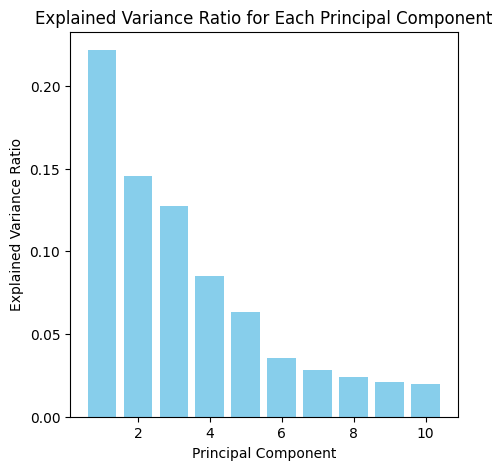

In [ ]:
# Fit PCA and transform the dataset
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the explained variance ratio for each component
pyplot.figure(figsize=(5, 5))
components = range(1, len(explained_variance_ratio) + 1)
pyplot.bar(components, explained_variance_ratio, color='skyblue')
pyplot.xlabel('Principal Component')
pyplot.ylabel('Explained Variance Ratio')
pyplot.title('Explained Variance Ratio for Each Principal Component')
pyplot.show()


USING mutual info

lr: Accuracy on the test set: 0.8466666666666667
knn: Accuracy on the test set: 0.9033333333333333
cart: Accuracy on the test set: 0.7466666666666667
svm: Accuracy on the test set: 0.91
bayes: Accuracy on the test set: 0.83
stacking: Accuracy on the test set: 0.9266666666666666
Feature Scores:
Feature 1: 0.0
Feature 2: 0.0
Feature 3: 0.019930917457451125
Feature 4: 0.0021956858356646514
Feature 5: 0.04580875787100558
Feature 6: 0.012513705645723627
Feature 7: 0.02745090748454171
Feature 8: 0.0
Feature 9: 0.02477172590081378
Feature 10: 0.02695281222934587
Feature 11: 0.04993220901166229
Feature 12: 0.019804575839954985
Feature 13: 0.0
Feature 14: 0.0
Feature 15: 0.08444483832053229
Feature 16: 0.0
Feature 17: 0.033076618978152394
Feature 18: 0.03889110958225084
Feature 19: 0.0
Feature 20: 0.0
Feature 21: 0.0
Feature 22: 0.027823933466455397
Feature 23: 0.004130830639507144
Feature 24: 0.0
Feature 25: 0.0
Feature 26: 0.02998039822782017
Feature 27: 0.003512644965041112
Feature 28: 0.004

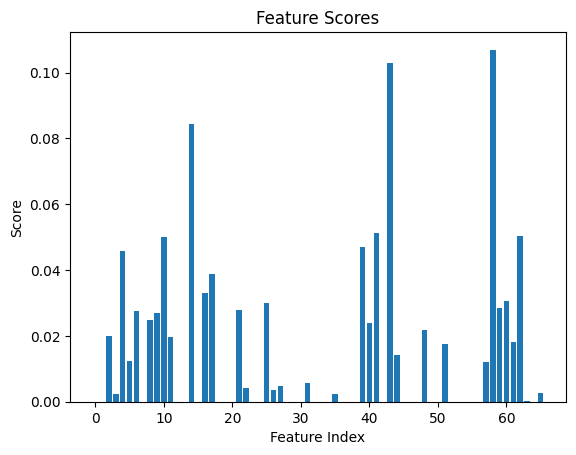

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=66, n_informative=15, n_redundant=5, random_state=1)
    return X, y

# Feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# Train and test a given model
def train_and_test_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Define a stacking ensemble of models
def get_stacking():
    level0 = [('lr', LogisticRegression()),
              ('knn', KNeighborsClassifier()),
              ('cart', DecisionTreeClassifier()),
              ('svm', SVC()),
              ('bayes', GaussianNB())]
    level1 = SVC()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# Get the models to evaluate
def get_models():
    models = {
        'lr': LogisticRegression(),
        'knn': KNeighborsClassifier(),
        'cart': DecisionTreeClassifier(),
        'svm': SVC(),
        'bayes': GaussianNB(),
        'stacking': get_stacking()
    }
    return models

# Load the dataset
X, y = get_dataset()

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Perform feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Train and test each model
models = get_models()
for name, model in models.items():
    accuracy = train_and_test_model(model, X_train_fs, X_test_fs, y_train, y_test)
    print(f'{name}: Accuracy on the test set: {accuracy}')

# Print the scores for the selected features
print("Feature Scores:")
for i in range(len(fs.scores_)):
    print(f'Feature {i+1}: {fs.scores_[i]}')

# Plot the scores for the selected features
plt.bar(range(len(fs.scores_)), fs.scores_)
plt.xlabel('Feature Index')
plt.ylabel('Score')
plt.title('Feature Scores')
plt.show()


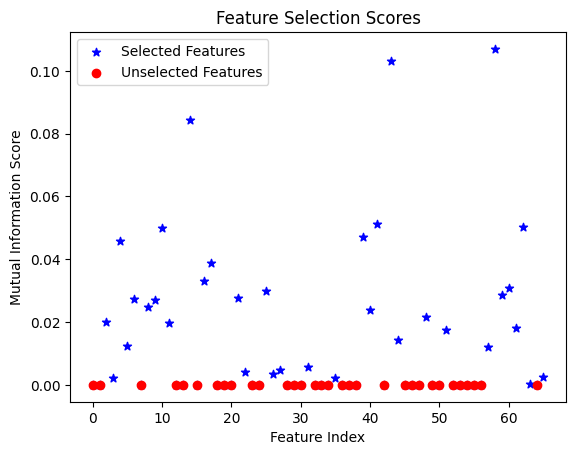

In [ ]:
# Scatter plot for feature selection scores
def scatter_plot_feature_selection_scores(fs):
    selected_indices = np.where(fs.get_support())[0]
    zero_indices = np.where(fs.scores_ == 0)[0]

    plt.scatter(selected_indices, fs.scores_[selected_indices], label='Selected Features', marker='*', color='blue')
    plt.scatter(zero_indices, fs.scores_[zero_indices], label='Unselected Features', marker='o', color='red')

    plt.xlabel('Feature Index')
    plt.ylabel('Mutual Information Score')
    plt.title('Feature Selection Scores')
    plt.legend()
    plt.show()
# Scatter plot for feature selection scores
scatter_plot_feature_selection_scores(fs)

**Using Rfe**

Ranks of All Features:
Feature 1: Rank 1
Feature 2: Rank 26
Feature 3: Rank 1
Feature 4: Rank 1
Feature 5: Rank 5
Feature 6: Rank 28
Feature 7: Rank 1
Feature 8: Rank 13
Feature 9: Rank 37
Feature 10: Rank 8
Feature 11: Rank 1
Feature 12: Rank 1
Feature 13: Rank 21
Feature 14: Rank 1
Feature 15: Rank 29
Feature 16: Rank 10
Feature 17: Rank 1
Feature 18: Rank 1
Feature 19: Rank 36
Feature 20: Rank 15
Feature 21: Rank 30
Feature 22: Rank 1
Feature 23: Rank 2
Feature 24: Rank 11
Feature 25: Rank 1
Feature 26: Rank 1
Feature 27: Rank 1
Feature 28: Rank 9
Feature 29: Rank 1
Feature 30: Rank 34
Feature 31: Rank 12
Feature 32: Rank 31
Feature 33: Rank 1
Feature 34: Rank 1
Feature 35: Rank 18
Feature 36: Rank 4
Feature 37: Rank 19
Feature 38: Rank 32
Feature 39: Rank 20
Feature 40: Rank 1
Feature 41: Rank 33
Feature 42: Rank 1
Feature 43: Rank 1
Feature 44: Rank 1
Feature 45: Rank 1
Feature 46: Rank 7
Feature 47: Rank 3
Feature 48: Rank 1
Feature 49: Rank 17
Feature 50: Rank 6
Feature 51: Rank

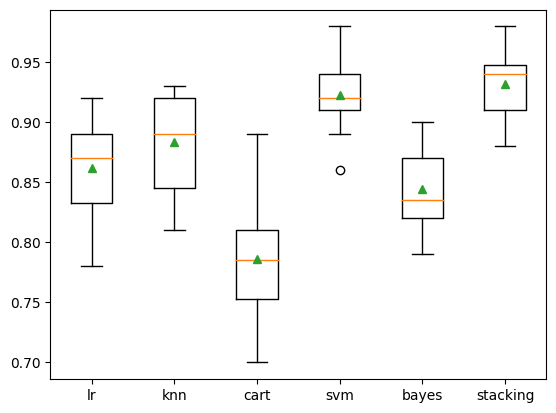

Accuracy on the test set: 0.91


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from matplotlib import pyplot
from sklearn.metrics import accuracy_score

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=66, n_informative=15, n_redundant=5, random_state=1)
    return X, y

# Function for feature selection using RFE
def select_features_rfe(X, y, estimator, n_features_to_select=None):
    # Create an instance of the estimator
    model = estimator()

    # Create the RFE object
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select, step=1)

    # Fit the RFE to the data
    rfe.fit(X, y)

    # Get the selected feature indices
    selected_indices = rfe.support_

    # Get the feature rankings
    ranks = rfe.ranking_

    # Print the ranks of all features
    print("Ranks of All Features:")
    for i, rank in enumerate(ranks):
        print(f"Feature {i+1}: Rank {rank}")

    # Get the selected feature names
    selected_feature_names = [f'feature_{i}' for i in range(X.shape[1]) if selected_indices[i]]

    # Return the data with selected features, the selected feature names, and the ranks of all features
    return X[:, selected_indices], selected_feature_names, ranks

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))

    # define meta learner model
    level1 = SVC()

    # define the stacking ensemble model
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(max_iter=10000)
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = get_dataset()

# Apply feature selection using RFE and get selected features, their names, and ranks
X_selected, selected_feature_names, ranks = select_features_rfe(X, y, estimator=LogisticRegression, n_features_to_select=30)

# Standardize the selected data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_scaled, y)  # Use scaled data for evaluation
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Select the best-performing model (in this case, let's assume it's the stacking classifier)
best_model = get_models()['stacking']

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


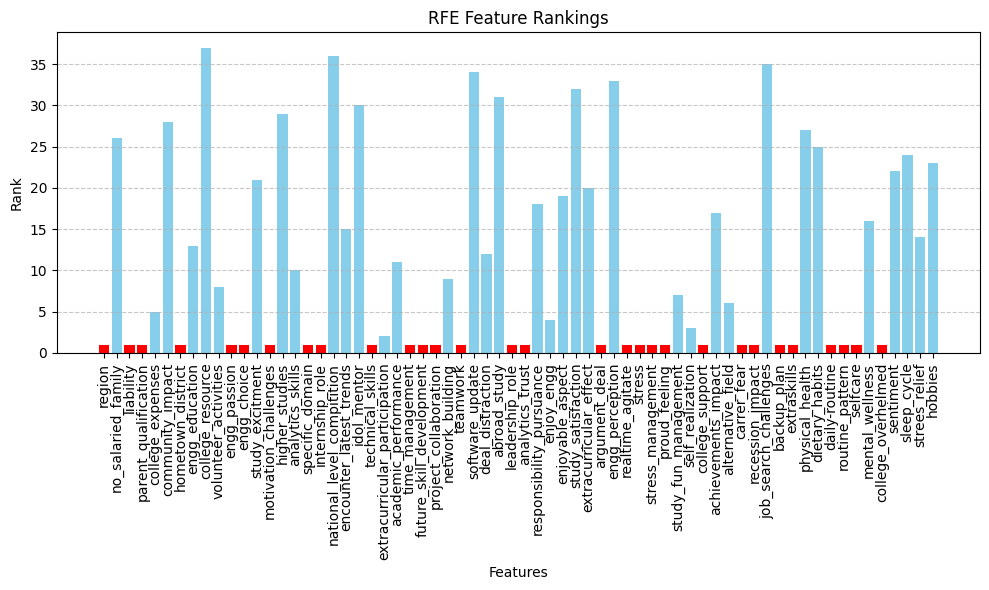

In [ ]:
import matplotlib.pyplot as plt

# Features and their corresponding ranks obtained from RFE
features = [
    "region", "no_salaried_family", "liability", "parent_qualification", "college_expenses", "community_impact", "hometown_district", "engg_education", "college_resource", "volunteer_activities", "engg_passion", "engg_choice", "study_excitment", "motivation_challenges", "higher_studies", "analytics_skills", "specific_domain", "internship_role", "national_level_compitition", "encounter_latest_trends", "idol_mentor", "technical_skills", "extracurricular_participation", "academic_performance", "time_management", "future_skill_development", "project_collaboration", "network_building", "teamwork", "software_update", "deal_distraction", "abroad_study", "leadership_role", "analytics_trust", "responsibility_pursuance", "enjoy_engg", "enjoyable_aspect", "study_satisfaction", "extracurricular_effect", "argument_deal", "engg_perception", "realtime_agitate", "stress", "stress_management", "proud_feeling", "study_fun_management", "self_realization", "college_support", "achievements_impact", "alternative_field", "carrer_fear", "recession_impact", "job_search_challenges", "backup_plan", "extraskills", "physical_health", "dietary_habits", "daily-routine", "routine_pattern", "selfcare", "mental_wellness", "college_overhelmed", "sentiment", "sleep_cycle", "strees_relief", "hobbies"
]

ranks = [
    1, 26, 1, 1, 5, 28, 1, 13, 37, 8, 1, 1, 21, 1, 29, 10, 1, 1, 36, 15,
    30, 1, 2, 11, 1, 1, 1, 9, 1, 34, 12, 31, 1, 1, 18, 4, 19, 32, 20, 1,
    33, 1, 1, 1, 1, 7, 3, 1, 17, 6, 1, 1, 35, 1, 1, 27, 25, 1, 1, 1, 16,
    1, 22, 24, 14, 23
]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
for i, rank in enumerate(ranks):
    if rank == 1:
        plt.bar(features[i], rank, color='red')
    else:
        plt.bar(features[i], rank, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Rank')
plt.title('RFE Feature Rankings')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


MOST PREFERRED FEATURES FROM ALL TECHNIQUE AND EVALUATION

In [ ]:
# Assuming df is your original DataFrame containing the dataset
feature_names = df.columns

# Print the actual feature names corresponding to the selected generic feature names
selected_generic_names = ['Feature 11', 'Feature 18', 'Feature 26', 'Feature 44', 'Feature 62', 'Feature 15', 'Feature 40', 'Feature 42', 'Feature 45', 'Feature 52', 'Feature 59', 'Feature 60', 'Feature 4', 'Feature 7', 'Feature 17', 'Feature 27', 'Feature 51']
selected_actual_names = [feature_names[int(name.split()[1])-1] for name in selected_generic_names]

print("Selected Actual Feature Names:")
print(selected_actual_names)


Selected Actual Feature Names:
['engg_passion', 'internship_role', 'future_skill_development', 'stress_management', 'college_overhelmed', 'higher_studies', 'argument_deal', 'realtime_agitate', 'proud_feeling', 'recession_impact', 'routine_pattern', 'selfcare', 'parent_qualification', 'hometown_district', 'specific_domain', 'project_collaboration', 'carrer_fear']


HEAT MAP OF SELECTED FEATURE


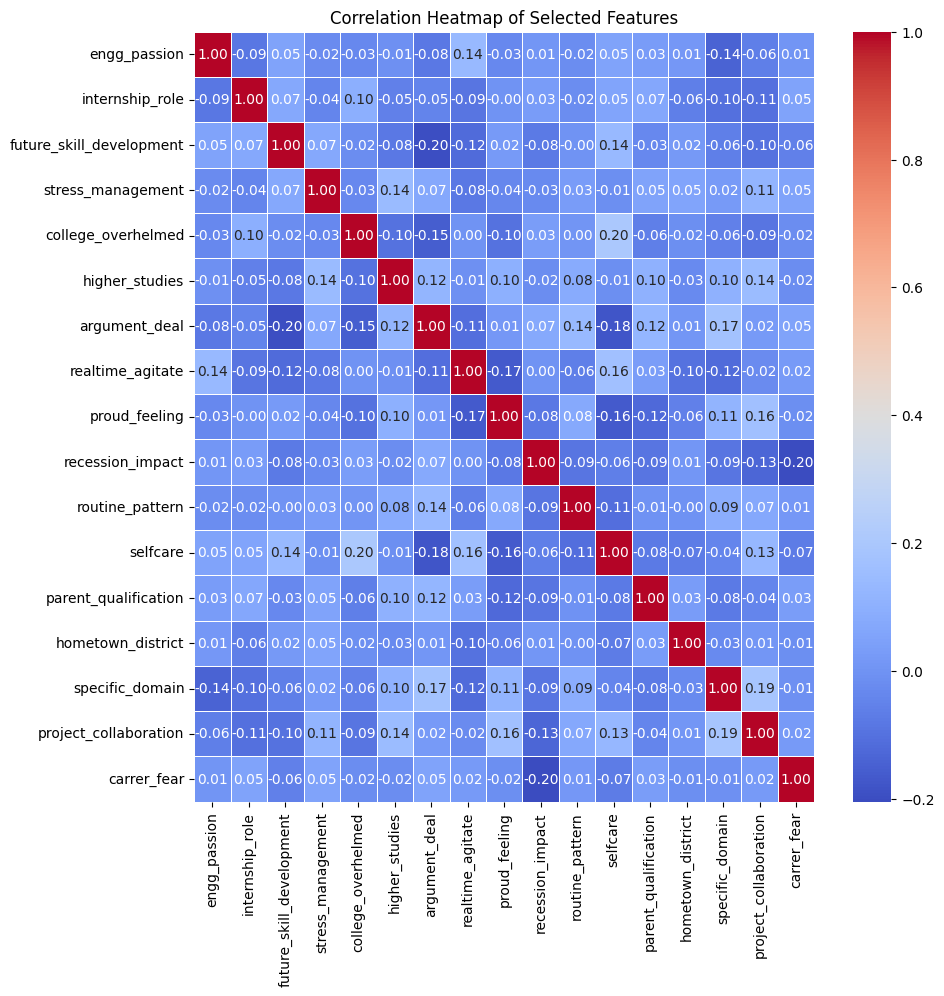

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame containing the dataset
# Assuming selected_actual_names contains the actual feature names of the selected features

# Create a subset of the dataset containing only the selected features
selected_features_df = df[selected_actual_names]

# Calculate the correlation matrix
correlation_matrix = selected_features_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()
